 # Experiment 3: Binary classification

Content

1. Introduction
2. Used libraries
3. Reading Clean Data from a CSV File
4. Case of study and data understanding
5. Split the data
6. Data Scaling
    
    6.1 Data Standardisation
    
    6.2 Data Normalisation 
    
    
7. Assess Baseline Model
8. Training a model
    
    8.1 Svm Classifier
    
    8.2 SVC Classifier reduce overfitting
    
    8.3 SVC Classifier with PCA for dimensionality reduction
    
    8.4 SVC Classifier with gamma 
    
    
9. Conclusion
10. References

## 1. Introduction

In the following study, we will fit a binary classification model using SVM classifier to predict if an existing customer is more likely to buy a new car as accurately as possible.

## 2. Used libraries 

In [1]:
#working with data
import pandas as pd
import numpy as np

#plotting data
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 3. Reading Clean Data from a CSV File

Raw data:

In [3]:
df = pd.read_csv('repurchase_training.csv')

In [4]:
df

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,154134,1,NaN,NaN,model_3,Large/SUV,7,10,10,9,10,10,10,3,6,10,10
131333,154135,1,NaN,NaN,model_3,Large/SUV,4,10,10,10,10,10,10,2,3,10,10
131334,154137,1,NaN,NaN,model_5,Large/SUV,4,4,9,5,4,3,8,4,7,10,10
131335,154138,1,NaN,NaN,model_5,Large/SUV,2,1,10,1,10,9,8,3,6,7,10


Clean data:

In [5]:
df_cleaned = pd.read_csv("df_cleaned2.csv")
#clean columns
df_cleaned.drop(df_cleaned.columns[0], axis=1, inplace=True)

In [6]:
df_cleaned.shape

(131337, 37)

In [7]:
df_cleaned

,Target,age_band,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,...,model_18,model_19,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9
0,0,3,9,2,10,3,7,5,6,9,...,0,0,0,0,0,0,0,0,0,0
1,0,0,6,10,3,10,4,9,10,6,...,0,0,1,0,0,0,0,0,0,0
2,0,0,9,10,9,10,9,10,10,7,...,0,0,0,1,0,0,0,0,0,0
3,0,0,5,8,5,8,4,5,6,4,...,0,0,0,1,0,0,0,0,0,0
4,0,0,8,9,4,10,7,9,8,5,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,1,0,7,10,10,9,10,10,10,3,...,0,0,0,1,0,0,0,0,0,0
131333,1,0,4,10,10,10,10,10,10,2,...,0,0,0,1,0,0,0,0,0,0
131334,1,0,4,4,9,5,4,3,8,4,...,0,0,0,0,0,1,0,0,0,0
131335,1,0,2,1,10,1,10,9,8,3,...,0,0,0,0,0,1,0,0,0,0


## 4. Case of study and data understanding 

**[4.1]** Hypothesis

The case study has the following hypothesis:
We will train an SVM Classifier model to predict if an existing customer is more likely to buy a new car. Assuming that there is an evident separation between classes and the algorithm will perform better than KNN in high dimensional problems (37 features in our scenario).

## 5. Split the data 

**[5.1]** Split data and test

Stratify=y will be used to distribute the data for train, valid and test proportionally, preserving the distribution of the two classes (Brownlee, 2020a), (Brownlee, 2020d).

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_cleaned.columns

Index(['Target', 'age_band', 'age_of_vehicle_years', 'sched_serv_warr',
       'non_sched_serv_warr', 'sched_serv_paid', 'non_sched_serv_paid',
       'total_paid_services', 'total_services', 'mth_since_last_serv',
       'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased', 'Male', 'LCV', 'Large/SUV', 'Other',
       'Small/Medium', 'model_1', 'model_10', 'model_11', 'model_12',
       'model_13', 'model_14', 'model_15', 'model_16', 'model_17', 'model_18',
       'model_19', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6',
       'model_7', 'model_8', 'model_9'],
      dtype='object')

In [10]:
X = df_cleaned[['age_band', 'age_of_vehicle_years', 'sched_serv_warr',
       'non_sched_serv_warr', 'sched_serv_paid', 'non_sched_serv_paid',
       'total_paid_services', 'total_services', 'mth_since_last_serv',
       'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased', 'Male', 'LCV', 'Large/SUV', 'Other',
       'Small/Medium', 'model_1', 'model_10', 'model_11', 'model_12',
       'model_13', 'model_14', 'model_15', 'model_16', 'model_17', 'model_18',
       'model_19', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6',
       'model_7', 'model_8', 'model_9']].values
y = df_cleaned['Target'].values

In [11]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
X_data.shape

(105069, 36)

In [13]:
y_data.shape

(105069,)

In [14]:
X_test.shape

(26268, 36)

In [15]:
y_test.shape

(26268,)

**[5.2]** Split train and validation

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(84055, 36)
(21014, 36)
(26268, 36)
(84055,)
(21014,)
(26268,)


**[5.3]** Count classes

In [18]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([81803,  2252], dtype=int64))

In [19]:
np.unique(y_val, return_counts=True)

(array([0, 1], dtype=int64), array([20449,   565], dtype=int64))

In [20]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([25564,   704], dtype=int64))

The count per label indicates that we are preserving the class distribution with 2,7% values class 1 over class 0.

## 6.  Data Scaling

We will perform a data scaling to prevent an increased bias in the model in a specific range of values. We will have two scaling approaches: Normalisation and Standardisation. (Arsik36, 2020), (Kapkar, 2020)

**[6.1]** Data Standardisation

"The Standardisation technique is used to center the feature columns at mean 0 with a standard deviation of 1 so that the feature columns have the same parameters as a standard normal distribution. Unlike Normalization, standardization maintains useful information about outliers and makes the algorithm less sensitive to them in contrast to min-max scaling, which scales the data to a limited range of values. Here is the formula for standardization." (Kumar, 2020)

"Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well-behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results." (Brownlee, 2020c)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [23]:
scaled = scaler.transform(X_train)
scaled

array([[ 3.69027246, -0.5248133 , -1.54443936, ..., -0.25852803,
        -0.22682549, -0.08655235],
       [-0.37610327, -0.17332784,  1.2296538 , ..., -0.25852803,
        -0.22682549, -0.08655235],
       [-0.37610327,  1.58409941, -0.15739278, ..., -0.25852803,
        -0.22682549, -0.08655235],
       ...,
       [-0.37610327,  1.58409941,  0.53613051, ..., -0.25852803,
        -0.22682549, -0.08655235],
       [-0.37610327,  0.88112851, -0.85091607, ..., -0.25852803,
        -0.22682549, -0.08655235],
       [-0.37610327, -1.57926965, -1.19767771, ..., -0.25852803,
        -0.22682549, -0.08655235]])

**[6.2]** Data Normalisation

"Normalization refers to the rescaling of the features to a range of [0, 1], which is a special case of min-max scaling. To normalize the data, the min-max scaling can be applied to one or more feature columns" (Kumar, 2020)

With this method, we will lose information from the data, like outliers. However, it is not a problem in the current study.

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler_norm = MinMaxScaler()
scaler_norm.fit(X_train)

MinMaxScaler()

In [26]:
scaled_norm = scaler_norm.transform(X_train)
scaled_norm

array([[0.85714286, 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.44444444, 0.88888889, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.44444444, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.77777778, 0.22222222, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.11111111, ..., 0.        , 0.        ,
        0.        ]])

**[6.3]** Replace features with scaler

In [27]:
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [28]:
X_train_norm = scaler_norm.transform(X_train)
X_val_norm = scaler_norm.transform(X_val)
X_test_norm = scaler_norm.transform(X_test)

## 7. Assess Baseline Model

This study will use F2 score. The reason behind the metric selection is based on the highly imbalanced dataset and the fact that we care more about positive class for the purpose of the prediction (Czakon, 2022) (Malato, 2021) and (Olugbenga, 2022). 

We want the prediction of repurchases to be as correct as possible and avoid false negative predictions (type II error) where the campaigns can lose potential clients. Moreover, we will prevent excessive type I error by predicting false potential clients.

This phenomenon could occur easily in this dataset due to the unbalanced classes in the study. (Brownlee, 2020a)(Brownlee, 2020b)


**[7.1]** base model

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, fbeta_score
from sklearn.metrics import auc, precision_recall_curve

In [30]:
from statistics import mode

In [81]:
y_mode = mode(y_train)
y_mode

0

In [82]:
y_train.shape

(84055,)

In [83]:
y_base = np.full(y_train.shape, y_mode)

In [84]:
y_base

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
y_base.shape

(84055,)

In [86]:
print(accuracy_score(y_train, y_base))
print(f1_score(y_train, y_base, average='weighted'))
print(precision_score(y_train, y_base))
print(recall_score(y_train, y_base))
print(average_precision_score(y_train, y_base))
print(fbeta_score(y_train, y_base, beta=2, pos_label=1, average='binary'))

0.9732080185592766
0.9599939169916978
0.0
0.0
0.026791981440723336
0.0


**[7.2]** confusion matrix

In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
results = confusion_matrix(y_train, y_base)
print(results)

[[81803     0]
 [ 2252     0]]


**[7.3]** Count classes

In [89]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([81803,  2252], dtype=int64))

## 8. Training a model

Based on: (So, 2023)  and (scikit-learn developers, 2023b)

The following model will use C and Gamma hyperparameters.
C controls the error rate in the model, while Gamma gives the curvature of the decision boundary and applies only when the model employs the Gaussian RBF kernel (Kumar, 2018). 
The study will search for a combination of hyperparameters that better fit the data.

**[8.1]** Svm Classifier

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, fbeta_score
from sklearn.metrics import auc, precision_recall_curve

from sklearn.svm import SVC

In [91]:
svc_default = SVC(probability=True, class_weight='balanced')

In [92]:
svc_default.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True)

In [93]:
y_train_preds_svc_default = svc_default.predict(X_train)

In [94]:
#score for the train set
print(accuracy_score(y_train, y_train_preds_svc_default))
print(f1_score(y_train, y_train_preds_svc_default, average='weighted'))
print(precision_score(y_train, y_train_preds_svc_default))
print(recall_score(y_train, y_train_preds_svc_default))
print(average_precision_score(y_train, y_train_preds_svc_default))
print(fbeta_score(y_train, y_train_preds_svc_default, beta=2, pos_label=1, average='binary'))

0.9428350484801618
0.9566078668936037
0.31683168316831684
0.9804618117229129
0.31116483286813296
0.6909933028728797


In [95]:
#confusion matrix
results = confusion_matrix(y_train, y_train_preds_svc_default)
print(results)

[[77042  4761]
 [   44  2208]]


In [96]:
#precision-recall auc curve
probs = svc_default.predict_proba(X_train)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_train, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('SVC PR AUC: %.3f' % auc_score)

SVC PR AUC: 0.809


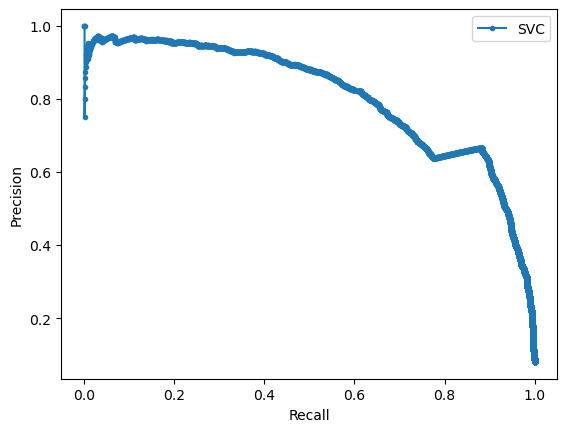

In [97]:
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='SVC')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [98]:
#score for the validation set
y_val_preds = svc_default.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9396592747692015
0.9543185461009667
0.3015245623941276
0.9451327433628318
0.2864559438516931
0.66236665839742


In [99]:
#precision-recall auc curve
probs = svc_default.predict_proba(X_val)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_val, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('SVC PR AUC: %.3f' % auc_score)

SVC PR AUC: 0.756


In [100]:
#score for the test set
y_test_preds = svc_default.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9397746307294046
0.9544059267860021
0.30099728014505894
0.9431818181818182
0.2854179272968596
0.6610911987256074


In [101]:
#precision-recall auc curve
probs = svc_default.predict_proba(X_test)
pos_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, thresholds = precision_recall_curve(y_test, pos_probs)

# precision-recall auc score
auc_score = auc(recall, precision)
print('SVC PR AUC: %.3f' % auc_score)

SVC PR AUC: 0.752


**[8.2]** SVC Classifier reduce overfitting

Based on: (scikit-learn developers, 2023a) and (So, 2023) 

In [102]:
c_values = [i for i in (0.45, 0.5, 0.8)]
scores = []

for c in c_values:
    svc = SVC(C = c, class_weight='balanced')
    svc.fit(X_train, y_train)
    y_train_preds_svc = svc.predict(X_train)
    score = fbeta_score(y_train, y_train_preds_svc, beta=2, pos_label=1, average='binary')
    scores.append(score)

Text(0, 0.5, 'f2 Score')

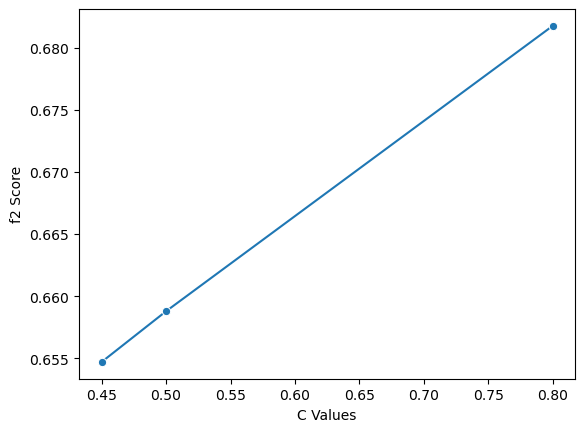

In [103]:
sns.lineplot(x = c_values, y = scores, marker = 'o')
plt.xlabel("C Values")
plt.ylabel("f2 Score")

In [104]:
scores

[0.6546981064665951, 0.6587847949715653, 0.6817760760822578]

In [105]:
best_index = np.argmax(scores)
best_c = c_values[best_index]

best_c

0.8

Model with best c (Regularization parameter):

In [106]:
svc_best = SVC(C = best_c, probability=True, class_weight='balanced')
svc_best.fit(X_train, y_train)
y_train_preds = svc_best.predict(X_train)

In [107]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

0.9402653024805188
0.9549493033228285
0.30730688935281836
0.9804618117229129
0.3018261362675021
0.6817760760822578


In [108]:
#score for the validation set
y_val_preds = svc_best.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9374226706005521
0.9529072066155119
0.29418221734357847
0.9486725663716814
0.2804626314676238
0.6565409113179813


In [109]:
#score for the test set
y_test_preds = svc_best.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9364245469773108
0.9522630041213375
0.28945074106364427
0.9431818181818182
0.2745274415723435
0.649706457925636


**[8.3]** SVC Classifier with PCA for dimensionality reduction

In [110]:
from sklearn.decomposition import PCA

pca=PCA(0.90)

In [111]:
X_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [112]:
pca.n_components_

22

In [113]:
X_pca.shape

(84055, 22)

In [114]:
c_values = [i for i in (5, 10, 20, 50)]
scores = []

for c in c_values:
    svc = SVC(C = c, class_weight='balanced')
    svc.fit(X_pca, y_train)
    y_train_preds_svc = svc.predict(X_pca)
    score = fbeta_score(y_train, y_train_preds_svc, beta=2, pos_label=1, average='binary')
    scores.append(score)

Text(0, 0.5, 'f2 Score')

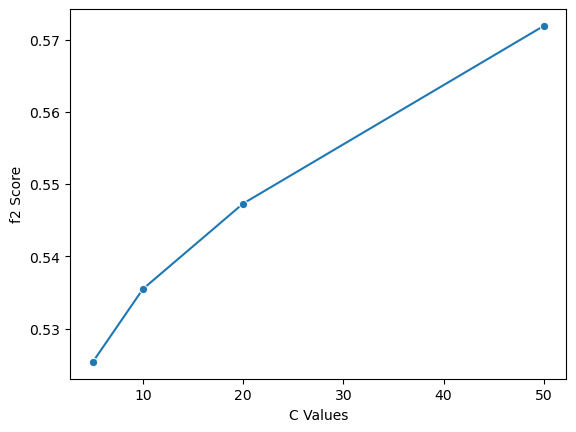

In [115]:
sns.lineplot(x = c_values, y = scores, marker = 'o')
plt.xlabel("C Values")
plt.ylabel("f2 Score")

In [116]:
scores

[0.5253876998888835,
 0.5354778600500171,
 0.5473010155585573,
 0.5718818266930199]

In [117]:
best_index = np.argmax(scores)
best_c = c_values[best_index]

best_c

50

Model with best c (Regularization parameter):

In [118]:
svc_best_pca = SVC(C = best_c, probability=True, class_weight='balanced')
svc_best_pca.fit(X_pca, y_train)

SVC(C=50, class_weight='balanced', probability=True)

In [119]:
y_train_preds = svc_best_pca.predict(X_pca)

In [120]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

0.9039676402355601
0.9321834329722543
0.21520845566647093
0.9764653641207816
0.2107741425519218
0.5718818266930199


In [121]:
#score for the validation set
y_val_preds = svc_best_pca.predict(X_val_pca)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9027315123251166
0.9310966707266471
0.2061978545887962
0.9185840707964602
0.1915990815035852
0.5432279673435211


In [122]:
#score for the test set
y_test_preds = svc_best_pca.predict(X_test_pca)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.8977843764275925
0.9281898069910693
0.19993941229930323
0.9375
0.18911824090664367
0.5394801373222168


**[8.4]** SVC Classifier with gamma

In [123]:
g_values = [i for i in (0.1, 1, 10)]
scores = []

for g in g_values:
    svc = SVC(C = 1, gamma = g, class_weight='balanced')
    svc.fit(X_train, y_train)
    y_train_preds_svc = svc.predict(X_train)
    score = fbeta_score(y_train, y_train_preds_svc, beta=2, pos_label=1, average='binary')
    scores.append(score)

Text(0, 0.5, 'f2 Score')

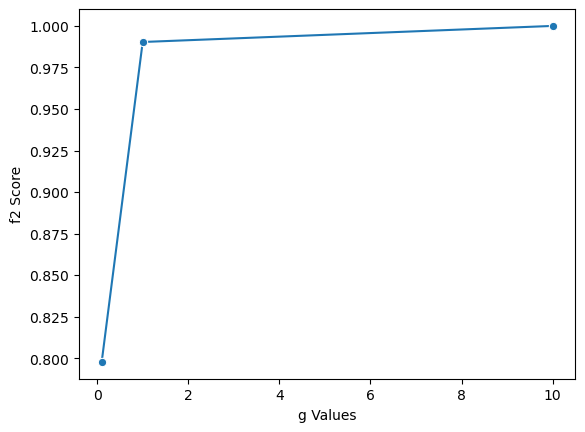

In [124]:
sns.lineplot(x = g_values, y = scores, marker = 'o')
plt.xlabel("g Values")
plt.ylabel("f2 Score")

In [125]:
scores

[0.7977391428775846, 0.990325417766051, 1.0]

In [126]:
best_index = np.argmax(scores)
best_g = g_values[best_index]

best_g

10

In [31]:
best_g = 10

For SVM, a high value of Gamma produces skewed results but also greater accuracy. Similar, a high value of the C - Cost parameter denotes poor accuracy but low bias, and vice versa.

Model with best g (curvature weight):

In [33]:
svc_best = SVC(C = 1, gamma = best_g, class_weight='balanced')
svc_best.fit(X_train, y_train)
y_train_preds = svc_best.predict(X_train)

In [34]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

1.0
1.0
1.0
1.0
1.0
1.0


In [35]:
#score for the validation set
y_val_preds = svc_best.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9730655753307319
0.9598291423442254
0.0
0.0
0.026886837346530884
0.0


In [36]:
#score for the test set
y_test_preds = svc_best.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9731993299832495
0.9599810029206587
0.0
0.0
0.02680067001675042
0.0


## 9. Conclusion

SVC model [8.1] was the model that obtained the best performance. However, the score is still low, and the model presents overfitting as its performance decreases in the validation and test data.
The decision is to continue experimenting with other models and techniques to improve performance.

## 10. References

Arsik36. (2020, August 7). Answer to ‘Scaling of categorical variable’. Stack Overflow. https://stackoverflow.com/a/63304313

Brownlee, J. (2020a, January 5). ROC Curves and Precision-Recall Curves for Imbalanced Classification. MachineLearningMastery.Com. https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/

Brownlee, J. (2020b, January 26). Cost-Sensitive Logistic Regression for Imbalanced Classification. MachineLearningMastery.Com. https://machinelearningmastery.com/cost-sensitive-logistic-regression/

Brownlee, J. (2020c, June 9). How to Use StandardScaler and MinMaxScaler Transforms in Python. MachineLearningMastery.Com. https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

Brownlee, J. (2020d, January 12). How to Fix k-Fold Cross-Validation for Imbalanced Classification. MachineLearningMastery.Com. https://machinelearningmastery.com/cross-validation-for-imbalanced-classification/

Czakon, J. (2022, July 21). F1 Score vs ROC AUC vs Accuracy vs PR AUC: Which Evaluation Metric Should You Choose? Neptune.Ai. https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc

Kapkar. (2020). Which Machine Learning requires Feature Scaling(Standardization and Normalization)? And Which not? | Data Science and Machine Learning. https://www.kaggle.com/getting-started/a

Kumar, A. (2020, July 27). MinMaxScaler vs StandardScaler—Python Examples. Data Analytics. https://vitalflux.com/minmaxscaler-standardscaler-python-examples/

Kumar, A. M. (2018, December 17). C and Gamma in SVM. Medium. https://medium.com/@myselfaman12345/c-and-gamma-in-svm-e6cee48626be

Malato, G. (2021, June 7). Precision, recall, accuracy. How to choose? Your Data Teacher. https://www.yourdatateacher.com/2021/06/07/precision-recall-accuracy-how-to-choose/

Olugbenga, M. (2022, July 22). Balanced Accuracy: When Should You Use It? Neptune.Ai. https://neptune.ai/blog/balanced-accuracy

scikit-learn developers. (2023a). 3.3. Metrics and scoring: Quantifying the quality of predictions. Scikit-Learn. https://scikit-learn.org/stable/modules/model_evaluation.html

scikit-learn developers. (2023b). Sklearn.svm.SVC. Scikit-Learn. https://scikit-learn/stable/modules/generated/sklearn.svm.SVC.html

So, A. (2023). Course Modules: 36106 Machine Learning Algorithms and Applications—Autumn 2023. Lab Solutions. https://canvas.uts.edu.au/courses/26202/modules

